In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba
import scipy.sparse as sp
import scipy.sparse.linalg as splinalg
import scipy.linalg as la

In [2]:
def generate_the_laplace_matrix_with_size(N=128):
    """
    assume sqrt(N) is an integer. Generate the Laplace matrix with size N

    """
    nsq = N * N
    A = np.zeros((nsq, nsq))
    A = _kernel(N, nsq, A)
    
    return A
    
@numba.jit(nopython=True)
def _kernel(N, nsq, A):
    for i in range(nsq):
        for j in range(nsq):
            if i == j:
                A[i, j] = 4
            elif (i == j + N or i == j - N):
                A[i, j] = -1
            elif (i == j + 1 or i == j - 1):
                if (((i + 1) % N == 0 and (j % N == 0)) or ((i % N == 0 and ((j + 1) % N == 0)))) and i != 0 and j != 0:
                    A[i, j] = 0
                else:
                    A[i, j] = -1
            else:
                A[i, j] = 0

    return A

In [3]:
def generate_rho(N=128, xmin=-5, xmax=5, ymin=-5,ymax=5):
    # TODO:
    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)

    xx,yy  = np.meshgrid(x, y, indexing='ij')
    r1 = (xx + 1.5)**2 + yy**2
    r2 = (xx - 1.5)**2 + yy**2
    rho = np.exp(-5 / 4 * r1**2) + 3 / 2 * np.exp(-(r2**2))
    
    return xx, yy, rho

def generate_the_rhs_vector_with_size(rho):
    
    bb = rho.flatten()
    
    return bb

In [4]:
N = 128

A = generate_the_laplace_matrix_with_size(N)

xx, yy, rho = generate_rho(N)
b = generate_the_rhs_vector_with_size(rho)


In [5]:
# print(A.shape)
print(b.shape)
print(rho.shape)

(16384,)
(128, 128)


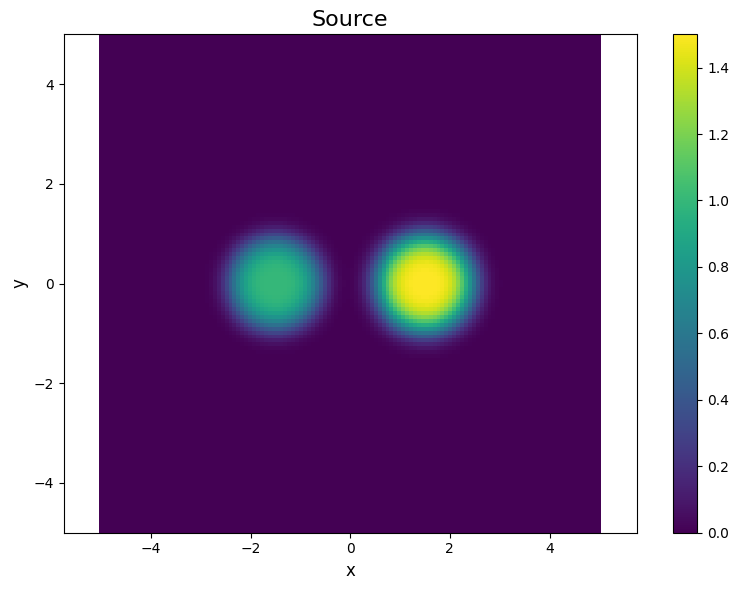

In [6]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, rho)
plt.colorbar()
# plt.contour(xx, yy, rho, colors='w')
plt.axis('equal')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.title('Source', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.tight_layout()
plt.savefig('source.png')
plt.show()

In [13]:
x = splinalg.spsolve(A, b)
x = x / la.norm(x) 

/var/folders/j1/hyd9nr6j5rj206vbv9nyjjcc0000gn/T/ipykernel_8443/3646545137.py:1: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  x = splinalg.spsolve(A, b)


In [14]:
u = x.reshape(N, N)
# u = np.linalg.norm(u, ord=2, axis=0)

In [11]:
for i in range(0, N, 8):
    print(u[64,1:100])

[  5.9950967    8.99725095  12.00493405  15.01999183  18.0442725
  21.0796271   24.12790988  27.19097852  30.27069429  33.36892192
  36.4875294   39.62838744  42.79336861  45.9843463   49.20319307
  52.45177868  55.73196749  59.04561525  62.3945651   65.78064269
  69.20565028  72.67135959  76.17950328  79.73176473  83.3297659
  86.97505302  90.66907953  94.41318608  98.20857698 102.05629253
 105.95717661 109.91183882 113.92061027 117.98349218 122.10009617
 126.26957519 130.49054376 134.76098647 139.07815315 143.4384398
 147.83725398 152.26886406 156.72623202 161.20083046 165.68244558
 170.15896942 174.61618733 179.03756877 183.40407386 187.69399144
 191.88282957 195.94328413 199.84531668 203.55637677 207.0418055
 210.26545112 213.19051248 215.78060083 218.00097877 219.81990341
 221.20997678 222.14939535 222.62299374 222.62299374 222.14939535
 221.20997678 219.81990341 218.00097877 215.78060083 213.19051248
 210.26545112 207.0418055  203.55637677 199.84531668 195.94328413
 191.88282957 

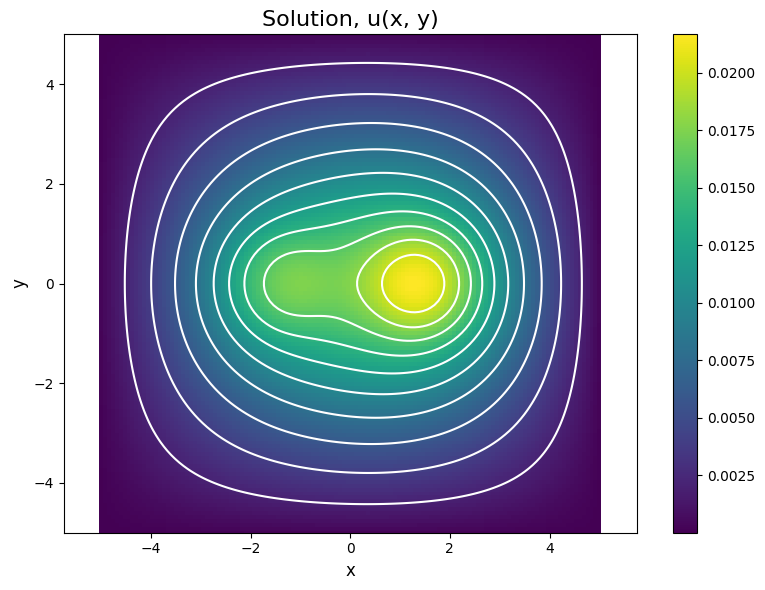

In [15]:
plt.figure(2, figsize=(8, 6))
plt.pcolormesh(xx, yy, u)
plt.colorbar()
plt.contour(xx, yy, u, 10, colors="w")
plt.axis('equal')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Solution, u(x, y)', fontsize=16)
plt.tight_layout()
plt.savefig('sol.png')
plt.show()